In [2]:
#Author: Amanpreet Kapoor
#Date: Fall 2017
#Group 9, Data Science Project - CAP 5771 (Fall 2017)

### This Notebook contains three sections :
#### 1. Data Cleaning
#### 2. k-means Clustering
#### 3. Linear Regression for for predicting continous grades
#### 4. Decision Tree Classification for predicting High and Low Learners

## 1. Data Cleaning

In [3]:
import pylab
import pandas as pd
moocs = pd.read_csv('input.csv')
moocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 20 columns):
course_id            641138 non-null object
userid_DI            641138 non-null object
registered           641138 non-null int64
viewed               641138 non-null int64
explored             641138 non-null int64
certified            641138 non-null int64
final_cc_cname_DI    641138 non-null object
LoE_DI               535130 non-null object
YoB                  544533 non-null float64
gender               554332 non-null object
grade                592766 non-null object
start_time_DI        641138 non-null object
last_event_DI        462184 non-null object
nevents              441987 non-null float64
ndays_act            478395 non-null float64
nplay_video          183608 non-null float64
nchapters            382385 non-null float64
nforum_posts         641138 non-null int64
roles                0 non-null float64
incomplete_flag      100161 non-null float64
dtypes: floa

In [4]:
moocs.describe()
#641138 participants in all before cleaning

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


### Cleaning all data to include grades which are available

In [5]:
#changing grades to numbers
moocs['grade'] = pd.to_numeric(moocs['grade'], errors='coerce')
moocs.describe()

,registered,viewed,explored,certified,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,583738.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,1.0,0.624299,0.061899,0.027587,1985.253279,0.033994,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,0.0,0.484304,0.240973,0.163786,8.891814,0.151436,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1982.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1988.000000,0.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,0.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,1.010000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


In [6]:
#removing all grades entries whose grade is missing
is_grade_incomplete = moocs[moocs['grade'] >= 0]
is_grade_incomplete = is_grade_incomplete[is_grade_incomplete['incomplete_flag'] != 1]

#substituting blank values in events, days, videos, chapters, and forum posts to 0
is_grade_incomplete['nevents'] = is_grade_incomplete['nevents'].fillna(0)
is_grade_incomplete['ndays_act'] = is_grade_incomplete['ndays_act'].fillna(0)
is_grade_incomplete['nplay_video'] = is_grade_incomplete['nplay_video'].fillna(0)
is_grade_incomplete['nchapters'] = is_grade_incomplete['nchapters'].fillna(0)
is_grade_incomplete['nforum_posts'] = is_grade_incomplete['nforum_posts'].fillna(0)

#removing dimensions that are not required in analysis
del is_grade_incomplete['registered']
del is_grade_incomplete['userid_DI']
del is_grade_incomplete['certified']
del is_grade_incomplete['start_time_DI']
del is_grade_incomplete['last_event_DI']
del is_grade_incomplete['roles']
del is_grade_incomplete['incomplete_flag']


In [7]:
is_grade_incomplete.describe()
is_grade_incomplete.head(2)
#489083 rows are remaining after first pass of cleaning

,course_id,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts
5,HarvardX/PH207x/2012_Fall,1,1,United States,NaN,NaN,NaN,0.0,502.0,16.0,50.0,12.0,0
7,HarvardX/CB22x/2013_Spring,1,0,France,NaN,NaN,NaN,0.0,42.0,6.0,0.0,3.0,0


In [8]:
final_data = is_grade_incomplete

### Normalizing all data by grouping them by courses (i.e. course_id)

In [9]:
x= final_data.groupby("course_id")

#computing missing values
missing_final_cc_cname_DI=missing_LoE_DI=missing_YoB=missing_gender=missing_vid=0
for i in x.groups.keys():
    missing_gender+= x.get_group(i)["grade"].count()-x.get_group(i)["gender"].count()
    missing_YoB+= x.get_group(i)["grade"].count()-x.get_group(i)["YoB"].count()
    missing_LoE_DI+= x.get_group(i)["grade"].count()-x.get_group(i)["LoE_DI"].count()
    missing_final_cc_cname_DI+= x.get_group(i)["grade"].count()-x.get_group(i)["final_cc_cname_DI"].count()
    missing_vid+= x.get_group(i)["grade"].count()-x.get_group(i)["nplay_video"].count()
print "Total columns="+ str(final_data["grade"].count())
print "-------------------------------------------  "
print "Missing Values \nGender=" + str(missing_gender)
print "Age=" + str(missing_YoB)
print "Education=" + str(missing_LoE_DI)
print "Country=" + str(missing_final_cc_cname_DI)
print "Videos=" + str(missing_vid)

Total columns=489083
-------------------------------------------  
Missing Values 
Gender=68085
Age=75378
Education=82113
Country=0
Videos=0


In [10]:
#final dataset with two all grades normalized

#Normalization of grades 

grade_total = x["grade"].min().rename("Grade Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["grade"].max().rename("Grade Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_Grade"]=(final_data["grade"]-final_data["Grade Min"])/(final_data["Grade Max"]-final_data["Grade Min"])

#Standardization - we tried the analysis with standardized grades but results were sub optimal

grade_total = x["grade"].mean().rename("Grade Mean").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["grade"].std().rename("Grade Std").reset_index()
final_data = final_data.merge(grade_total)
final_data["Standardized_Grade"]=(final_data["grade"]-final_data["Grade Mean"])/final_data["Grade Std"]

#Deleting Extraneous columns

del final_data["Grade Max"]
del final_data["Grade Min"]
del final_data["Grade Mean"]
del final_data["Grade Std"]
del final_data["grade"]
del final_data["Standardized_Grade"]
final_data.rename(columns={"Normalized_Grade":"Grades"}, inplace=True)
final_data.describe()

,viewed,explored,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,Grades
count,489083.000000,489083.000000,413705.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.00000
mean,0.606568,0.075120,1985.296199,379.256408,5.003124,41.689601,2.405111,0.023644,0.04073
std,0.488512,0.263585,8.832121,1444.101855,11.551903,265.531583,4.286954,0.257926,0.16521
min,0.000000,0.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1982.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1988.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.00000
75%,1.000000,0.000000,1991.000000,109.000000,4.000000,6.000000,3.000000,0.000000,0.00000
max,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,1.00000


In [11]:
#Normalizing Videos

grade_total = x["nplay_video"].min().rename("Play Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["nplay_video"].max().rename("Play Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_Play"]=(final_data["nplay_video"]-final_data["Play Min"])/(final_data["Play Max"]-final_data["Play Min"])
del final_data["Play Max"]
del final_data["Play Min"]

final_data.rename(columns={"Normalized_Play":"Video"}, inplace=True)
del final_data["nplay_video"]
final_data.describe()


,viewed,explored,YoB,nevents,ndays_act,nchapters,nforum_posts,Grades,Video
count,489083.000000,489083.000000,413705.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.00000,318560.000000
mean,0.606568,0.075120,1985.296199,379.256408,5.003124,2.405111,0.023644,0.04073,0.004566
std,0.488512,0.263585,8.832121,1444.101855,11.551903,4.286954,0.257926,0.16521,0.021313
min,0.000000,0.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,1982.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,1988.000000,11.000000,1.000000,1.000000,0.000000,0.00000,0.000030
75%,1.000000,0.000000,1991.000000,109.000000,4.000000,3.000000,0.000000,0.00000,0.001228
max,1.000000,1.000000,2013.000000,197757.000000,205.000000,48.000000,20.000000,1.00000,1.000000


In [12]:
#Normalizing Events

grade_total = x["nevents"].min().rename("Events Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["nevents"].max().rename("Events Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_events"]=(final_data["nevents"]-final_data["Events Min"])/(final_data["Events Max"]-final_data["Events Min"])
del final_data["Events Max"]
del final_data["Events Min"]

final_data.rename(columns={"Normalized_events":"Events"}, inplace=True)
del final_data["nevents"]
final_data.describe()

,viewed,explored,YoB,ndays_act,nchapters,nforum_posts,Grades,Video,Events
count,489083.000000,489083.000000,413705.000000,489083.000000,489083.000000,489083.000000,489083.00000,318560.000000,489083.000000
mean,0.606568,0.075120,1985.296199,5.003124,2.405111,0.023644,0.04073,0.004566,0.012262
std,0.488512,0.263585,8.832121,11.551903,4.286954,0.257926,0.16521,0.021313,0.042166
min,0.000000,0.000000,1931.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1982.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000024
50%,1.000000,0.000000,1988.000000,1.000000,1.000000,0.000000,0.00000,0.000030,0.000459
75%,1.000000,0.000000,1991.000000,4.000000,3.000000,0.000000,0.00000,0.001228,0.004365
max,1.000000,1.000000,2013.000000,205.000000,48.000000,20.000000,1.00000,1.000000,1.000000


In [13]:
#Normalizing Activity

grade_total = x["ndays_act"].min().rename("act Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["ndays_act"].max().rename("act Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_act"]=(final_data["ndays_act"]-final_data["act Min"])/(final_data["act Max"]-final_data["act Min"])
del final_data["act Max"]
del final_data["act Min"]

final_data.rename(columns={"Normalized_act":"Activity"}, inplace=True)
del final_data["ndays_act"]
final_data.describe()

,viewed,explored,YoB,nchapters,nforum_posts,Grades,Video,Events,Activity
count,489083.000000,489083.000000,413705.000000,489083.000000,489083.000000,489083.00000,318560.000000,489083.000000,489083.000000
mean,0.606568,0.075120,1985.296199,2.405111,0.023644,0.04073,0.004566,0.012262,0.034306
std,0.488512,0.263585,8.832121,4.286954,0.257926,0.16521,0.021313,0.042166,0.077138
min,0.000000,0.000000,1931.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1982.000000,0.000000,0.000000,0.00000,0.000000,0.000024,0.006250
50%,1.000000,0.000000,1988.000000,1.000000,0.000000,0.00000,0.000030,0.000459,0.009756
75%,1.000000,0.000000,1991.000000,3.000000,0.000000,0.00000,0.001228,0.004365,0.025157
max,1.000000,1.000000,2013.000000,48.000000,20.000000,1.00000,1.000000,1.000000,1.000000


In [14]:
#Normalizing Chapters 

grade_total = x["nchapters"].min().rename("act Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["nchapters"].max().rename("act Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_act"]=(final_data["nchapters"]-final_data["act Min"])/(final_data["act Max"]-final_data["act Min"])
del final_data["act Max"]
del final_data["act Min"]

final_data.rename(columns={"Normalized_act":"Chapters"}, inplace=True)
del final_data["nchapters"]
final_data.describe()

,viewed,explored,YoB,nforum_posts,Grades,Video,Events,Activity,Chapters
count,489083.000000,489083.000000,413705.000000,489083.000000,489083.00000,318560.000000,489083.000000,489083.000000,489083.000000
mean,0.606568,0.075120,1985.296199,0.023644,0.04073,0.004566,0.012262,0.034306,0.131830
std,0.488512,0.263585,8.832121,0.257926,0.16521,0.021313,0.042166,0.077138,0.221521
min,0.000000,0.000000,1931.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1982.000000,0.000000,0.00000,0.000000,0.000024,0.006250,0.000000
50%,1.000000,0.000000,1988.000000,0.000000,0.00000,0.000030,0.000459,0.009756,0.055556
75%,1.000000,0.000000,1991.000000,0.000000,0.00000,0.001228,0.004365,0.025157,0.157895
max,1.000000,1.000000,2013.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Normalizing Forums

grade_total = x["nforum_posts"].min().rename("act Min").reset_index()
final_data = final_data.merge(grade_total)
grade_total = x["nforum_posts"].max().rename("act Max").reset_index()
final_data = final_data.merge(grade_total)
final_data["Normalized_act"]=(final_data["nforum_posts"]-final_data["act Min"])/(final_data["act Max"]-final_data["act Min"])
del final_data["act Max"]
del final_data["act Min"]

final_data.rename(columns={"Normalized_act":"Forums"}, inplace=True)
del final_data["nforum_posts"]
final_data.describe()

,viewed,explored,YoB,Grades,Video,Events,Activity,Chapters,Forums
count,489083.000000,489083.000000,413705.000000,489083.00000,318560.000000,489083.000000,489083.000000,489083.000000,388991.000000
mean,0.606568,0.075120,1985.296199,0.04073,0.004566,0.012262,0.034306,0.131830,0.003905
std,0.488512,0.263585,8.832121,0.16521,0.021313,0.042166,0.077138,0.221521,0.037156
min,0.000000,0.000000,1931.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1982.000000,0.00000,0.000000,0.000024,0.006250,0.000000,0.000000
50%,1.000000,0.000000,1988.000000,0.00000,0.000030,0.000459,0.009756,0.055556,0.000000
75%,1.000000,0.000000,1991.000000,0.00000,0.001228,0.004365,0.025157,0.157895,0.000000
max,1.000000,1.000000,2013.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
del final_data["viewed"]
del final_data["explored"]

In [17]:
# Renaming all columns to easy names
final_data.rename(columns={"final_cc_cname_DI":"Country"}, inplace=True)
final_data.describe()

,YoB,Grades,Video,Events,Activity,Chapters,Forums
count,413705.000000,489083.00000,318560.000000,489083.000000,489083.000000,489083.000000,388991.000000
mean,1985.296199,0.04073,0.004566,0.012262,0.034306,0.131830,0.003905
std,8.832121,0.16521,0.021313,0.042166,0.077138,0.221521,0.037156
min,1931.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,0.00000,0.000000,0.000024,0.006250,0.000000,0.000000
50%,1988.000000,0.00000,0.000030,0.000459,0.009756,0.055556,0.000000
75%,1991.000000,0.00000,0.001228,0.004365,0.025157,0.157895,0.000000
max,2013.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Generate Missing Values

In [18]:
%%time 

#1 : infer age from education level -> by grouping and taking mean age of educational level

x= final_data.groupby("LoE_DI")

meandict={}

# creating a dictionary of mean educational levels
for i in x.groups.keys():
    a= x.get_group(i)
    meandict[i]=a["YoB"].mean()

final_data1=final_data
final_data1['YoB'] = final_data1['YoB'].fillna(final_data1['LoE_DI'].map(meandict))
final_data=final_data1
final_data.describe()

Wall time: 342 ms


In [19]:
x= final_data.groupby("course_id")

#computing missing values
missing_final_cc_cname_DI=missing_LoE_DI=missing_YoB=missing_gender=missing_vid=0
for i in x.groups.keys():
    missing_gender+= x.get_group(i)["Grades"].count()-x.get_group(i)["gender"].count()
    missing_YoB+= x.get_group(i)["Grades"].count()-x.get_group(i)["YoB"].count()
print "Total columns="+ str(final_data["Grades"].count())
print "-------------------------------------------  "
print "Missing Values \nGender=" + str(missing_gender)
print "Age=" + str(missing_YoB)
print "Education=" + str(missing_LoE_DI)
print "Country=" + str(missing_final_cc_cname_DI)
print "Videos=" + str(missing_vid)

Total columns=489083
-------------------------------------------  
Missing Values 
Gender=68085
Age=71537
Education=0
Country=0
Videos=0


In [20]:
#2 : Setting Forum values to the mean of forum value for the dataset

final_data['Forums'] = final_data['Forums'].fillna(final_data['Forums'].mean())

Pearsons Coefficient=0.748870831085
P value=0.0


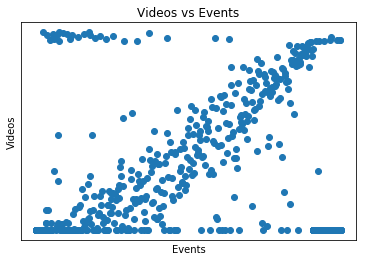

In [21]:
#3 : inferring videos from activity level as there is a positive correlation between activity and videos

#Showing correlation between videos and activity
final_data.describe()
ff=final_data
ff=ff[ff["Video"]==ff["Video"]]
vid=ff[["Video"]]
act=ff[["Events"]]
from scipy.stats.stats import pearsonr 
print "Pearsons Coefficient="+ str(pearsonr(vid, act)[0][0])
print "P value="+ str(pearsonr(vid, act)[1][0])
vid=vid[::500]
act=act[::500]
import matplotlib.pyplot as plt
plt.scatter(act,vid)
plt.title('Videos vs Events')
plt.xlabel('Events')
plt.ylabel('Videos')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
# replacing missing video values from activity using linear regression model

final_data.describe()
ff=final_data
ff=ff[ff["Video"]==ff["Video"]]
vid=ff[["Video"]]
act=ff[["Events"]]

test_act=act[310000:]
train_act=act[:310000]
test_vid=vid[310000:]
train_vid=vid[:310000]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(train_act, train_vid)
vid_predict= regr.predict(test_act)

x= final_data.groupby("course_id")

def x_form (x, x1):
    if x!=x:
        return regr.predict(x1)[0][0]
    else:
        return x

final_data['Video']=final_data.apply(lambda row: x_form(row['Video'], row['Events']), axis =1)

print "Mean squared error of the model that will predict missing videos: ", mean_squared_error(test_vid, vid_predict) 
print "R2 score of the model that will predict missing videos: ", r2_score(test_vid, vid_predict) 


Mean squared error of the model that will predict missing videos:  0.00090193472849
R2 score of the model that will predict missing videos:  0.281677528071


In [23]:
# Replacing remaining age values by mean age of each course

meandict={}

# creating a dictionary of mean ages
for i in x.groups.keys():
    a= x.get_group(i)
    meandict[i]=a["YoB"].mean()

final_data1=final_data
final_data1['YoB'] = final_data1['YoB'].fillna(final_data1['course_id'].map(meandict))

In [24]:
# Normalizing the educational levels

final_data["LoE_DI"]=final_data["LoE_DI"].replace("Less than Secondary",1)
final_data["LoE_DI"]=final_data["LoE_DI"].replace("Secondary",2)
final_data["LoE_DI"]=final_data["LoE_DI"].replace("Bachelor's",3)
final_data["LoE_DI"]=final_data["LoE_DI"].replace("Master's",4)
final_data["LoE_DI"]=final_data["LoE_DI"].replace("Doctorate",5)

final_data["LoE_DI"]=(final_data["LoE_DI"]-final_data["LoE_DI"].min())/(final_data["LoE_DI"].max()-final_data["LoE_DI"].min())

final_data.rename(columns={"LoE_DI":"Education"}, inplace=True)

In [25]:
# Changing Gender to Numeric Data

final_data["gender_male"]=(final_data["gender"]=='m').astype(int)
final_data["gender_female"]=(final_data["gender"]=='f').astype(int)
final_data["gender_others"]=(final_data["gender"]=='o').astype(int)


In [26]:
#changing course_id to individual categorical variables for the data

x= final_data.groupby("course_id")
for i in x.groups.keys():
    final_data[i]=(final_data["course_id"]==i).astype(int)
del final_data["course_id"]

In [27]:
final_data.head(5)

,Country,Education,YoB,gender,Grades,Video,Events,Activity,Chapters,Forums,...,MITx/3.091x/2013_Spring,MITx/2.01x/2013_Spring,MITx/6.00x/2013_Spring,HarvardX/PH207x/2012_Fall,HarvardX/CS50x/2012,MITx/3.091x/2012_Fall,MITx/6.00x/2012_Fall,MITx/7.00x/2013_Spring,MITx/14.73x/2013_Spring,MITx/8.02x/2013_Spring
0,United States,NaN,1982.431291,NaN,0.0,0.001445,0.011440,0.100629,0.7500,0.000000,...,0,0,0,1,0,0,0,0,0,0
1,United States,NaN,1982.431291,NaN,0.0,0.000145,0.001709,0.088050,0.1250,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,United States,NaN,1982.431291,NaN,0.0,0.000029,0.001276,0.069182,0.1250,0.166667,...,0,0,0,1,0,0,0,0,0,0
3,United States,NaN,1982.431291,NaN,0.0,0.000000,0.000023,0.006289,0.0000,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,United States,NaN,1982.431291,NaN,0.0,0.000058,0.000820,0.075472,0.0625,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# Replacing remaining gender values by decision tree classification

fd=final_data
fd = fd[fd["gender"]==fd["gender"]]
fd.describe()

list_cols=['YoB','Grades','Video', 'Events', 'Activity', 'Chapters', 'Forums','MITx/6.002x/2013_Spring', 
              'HarvardX/ER22x/2013_Spring',
       'MITx/6.002x/2012_Fall', 'HarvardX/CB22x/2013_Spring',
       'HarvardX/PH278x/2013_Spring', 'MITx/8.MReV/2013_Summer',
       'MITx/3.091x/2013_Spring', 'MITx/2.01x/2013_Spring',
       'MITx/6.00x/2013_Spring', 'HarvardX/PH207x/2012_Fall',
       'HarvardX/CS50x/2012', 'MITx/3.091x/2012_Fall',
       'MITx/6.00x/2012_Fall', 'MITx/7.00x/2013_Spring',
       'MITx/14.73x/2013_Spring', 'MITx/8.02x/2013_Spring']

fd_values=fd[list_cols]
fd_labels=fd[["gender"]]

#Replacing Males with 0, Females with 1 and Others with 0
fd[["gender"]].replace('m',0)
fd[["gender"]].replace('f',1)
fd[["gender"]].replace('o',2)

fd_values_s1=fd_values[0:310000]
fd_labels_s1=fd_labels[0:310000]

from sklearn import tree
X = fd_values_s1
Y = fd_labels_s1

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

from sklearn.tree import DecisionTreeClassifier
print clf.score(fd_values[310000:],fd_labels[310000:])

0.66805708211


In [29]:
def gender_form (x, x1):
    if x!=x:
        return clf.predict([x1.tolist()])
    else:
        return x

#final_data['Video']=final_data.apply(lambda row: x_form(row['Video'], row['Events']), axis =1)
final_data['gender']=final_data.apply(lambda row: gender_form(row['gender'],row[list_cols]), axis =1)
final_data.describe()  

,Education,YoB,Grades,Video,Events,Activity,Chapters,Forums,gender_male,gender_female,...,MITx/3.091x/2013_Spring,MITx/2.01x/2013_Spring,MITx/6.00x/2013_Spring,HarvardX/PH207x/2012_Fall,HarvardX/CS50x/2012,MITx/3.091x/2012_Fall,MITx/6.00x/2012_Fall,MITx/7.00x/2013_Spring,MITx/14.73x/2013_Spring,MITx/8.02x/2013_Spring
count,406970.000000,489083.000000,489083.00000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,...,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000,489083.000000
mean,0.478531,1985.384139,0.04073,0.004237,0.012262,0.034306,0.131830,0.003905,0.637603,0.223181,...,0.009497,0.010383,0.090482,0.072546,0.204652,0.026531,0.132575,0.037462,0.048311,0.049137
std,0.214093,8.180943,0.16521,0.019039,0.042166,0.077138,0.221521,0.033137,0.480693,0.416379,...,0.096991,0.101365,0.286871,0.259390,0.403448,0.160709,0.339115,0.189891,0.214422,0.216154
min,0.000000,1931.000000,0.00000,-0.000169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1983.000000,0.00000,0.000000,0.000024,0.006250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1987.000000,0.00000,0.000014,0.000459,0.009756,0.055556,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1991.000000,0.00000,0.001272,0.004365,0.025157,0.157895,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2013.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Changing Gender to Numeric Data

final_data["gender_male"]=(final_data["gender"]=='m').astype(int)
final_data["gender_female"]=(final_data["gender"]=='f').astype(int)
final_data["gender_others"]=(final_data["gender"]=='o').astype(int)
del final_data["gender"]

In [31]:
#changing country to individual binary categorical variables for the data

x= final_data.groupby("Country")
for i in x.groups.keys():
    final_data[i]=(final_data["Country"]==i).astype(int)
del final_data["Country"]

In [32]:
#To remove - Education Level for NA's set as average education levels
final_data['Education'] = final_data['Education'].fillna(final_data['Education'].mean())
del final_data['YoB']

### Final dataset with linear grades

In [33]:
final_data.head(2)
final_data.to_csv('MOOC_CleanedDataSet.csv')

## 2. k-means Clustering

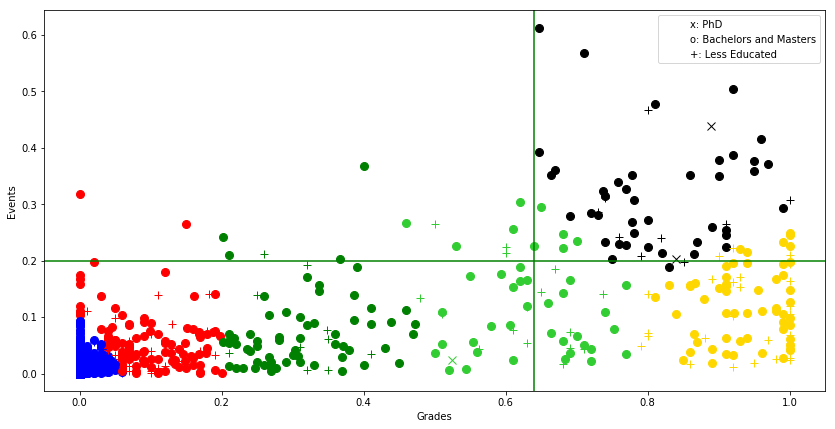

Wall time: 29.1 s


In [34]:
%%time

moocs=final_data

from sklearn.cluster import KMeans
a= final_data[["Events", "Grades"]]
kmeans = KMeans(n_clusters=6, random_state=0).fit(a)
#print a["Events"].unique(), a["Grades"].unique()

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.colors

li={0.4785309727989778:"red", 0.5:"red", 0.25:"gold", 0.75:"red", 1.0:"blue", 0.0:"gold"}
ma={0.4785309727989778:'o', 0.5:'o', 0.25:'+', 0.75:'o', 1.0:'x', 0.0:'+'}
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colors=["red", "gold", "blue","limegreen","green","black"]

for x in range(0,len(a["Events"]),100):
    plt.plot(a["Grades"][x],a["Events"][x],color=colors[kmeans.labels_[x]], marker=ma[moocs["Education"][x]],markersize=8)
plt.xlabel("Grades")
plt.ylabel("Events")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

blue_patch = mpatches.Patch(label='x: PhD',color='white')
red_patch = mpatches.Patch(label='o: Bachelors and Masters',color='white')
gold_patch = mpatches.Patch(label='+: Less Educated',color='white')
plt.axhline(y=0.2,color='g')
plt.axvline(x=0.64,color='g')
plt.legend(handles=[blue_patch,red_patch,gold_patch])
plt.show()

## 3. Linear Regression for for predicting continous grades

In [35]:
moocs=final_data

gra=moocs[["Grades"]]
l=[]
for i in moocs.keys():
    if i=="Grades":
        continue
    else:
        l.append(i)
#print l
l=['Education', 'Events','Forums', 'Activity', 'Chapters', 'gender_male', 'gender_female', 'gender_others','MITx/6.002x/2013_Spring', 'HarvardX/ER22x/2013_Spring', 'MITx/6.002x/2012_Fall', 'HarvardX/CB22x/2013_Spring', 'HarvardX/PH278x/2013_Spring','MITx/3.091x/2013_Spring', 
   'MITx/6.00x/2013_Spring', 'HarvardX/PH207x/2012_Fall', 'HarvardX/CS50x/2012', 'MITx/3.091x/2012_Fall','MITx/6.00x/2012_Fall', 'MITx/7.00x/2013_Spring', 'MITx/8.02x/2013_Spring', 'Brazil', 'Canada', 'Bangladesh', 'Other South America', 'Other South Asia', 'France', 'Nigeria', 'Other Oceania', 'Other Europe', 'Other East Asia', 'Other North & Central Amer., Caribbean', 
   'Australia', 'China', 'Russian Federation', 'Germany', 'Philippines', 'Spain', 'Ukraine', 'Poland', 'Indonesia', 'United States', 'Morocco', 'Unknown/Other', 'Other Africa', 'Pakistan', 'Portugal','Mexico', 'Egypt', 'India', 'Other Middle East/Central Asia', 'United Kingdom', 'Colombia', 'Greece', 'Japan'
  ]

features=moocs[l]
test_act=features[450000:]
train_act=features[:450000]
test_vid=gra[450000:]
train_vid=gra[:450000]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(train_act, train_vid)
vid_predict= regr.predict(test_act)

for i in range(0,len(vid_predict)):
    if vid_predict[i]<0:
        vid_predict[i]=0

print "Mean squared error of the model that will predict missing videos: ", mean_squared_error(test_vid, vid_predict) 
print "R2 score of the model that will predict missing videos: ", r2_score(test_vid, vid_predict) 


Mean squared error of the model that will predict missing videos:  0.00856682143478
R2 score of the model that will predict missing videos:  0.788816458289


39083


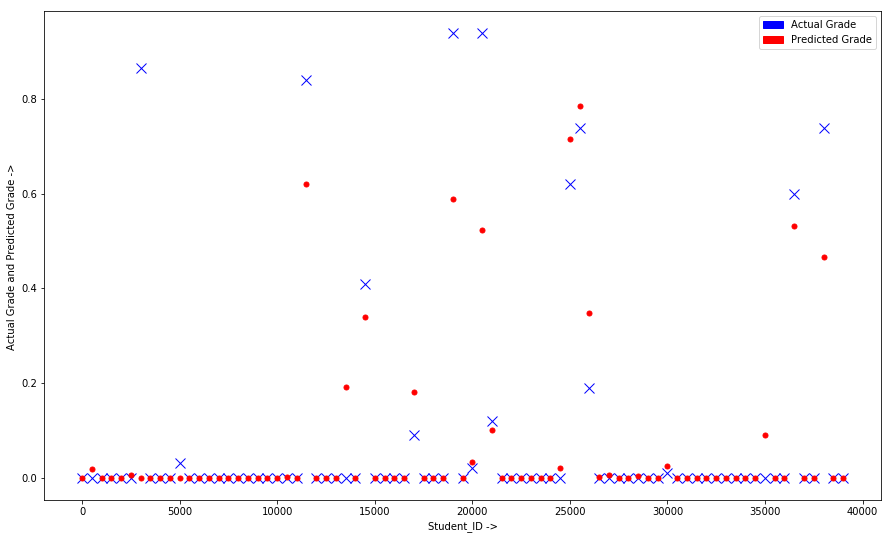

In [36]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
aa=test_vid.values.tolist()
bb=vid_predict

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 9)

for i in range(len(bb)):
    if bb[i]<0:
        bb[i]=0

print len(vid_predict)
for i in range(0, len(aa),500):
    plt.plot(i, aa[i], color='blue', marker='x',markersize=10)
    plt.plot(i, bb[i], color='red', marker='o',markersize=5)
    #plt.plot([i,i],[aa[i],bb[i]],'ro-',color='green',linewidth="0.1")
    #plt.xticks(())
    #plt.yticks(())
    
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

blue_patch = mpatches.Patch(color='blue', label='Actual Grade')
red_patch = mpatches.Patch(color='red', label='Predicted Grade')
plt.xlabel("Student_ID ->")
plt.ylabel("Actual Grade and Predicted Grade -> ")
plt.legend(handles=[blue_patch,red_patch])
plt.show()
plt.close()

## 4. Decision Tree Classification for predicting High and Low Learners


In [37]:
# Changing grades to 0 or 1 -  1 are high learners, grade >=60 and 0 are low learners <60
aaa=final_data

aaa["Grades_Category"]=(aaa["Grades"]>=0.6).astype(int)
aaa["Grades_Category"].describe()
aaa["Grades"]=final_data["Grades_Category"]
del aaa["Grades_Category"]


In [38]:
%%time
fd=aaa
fd.describe()

list_cols=['Education', 'Video', 'Events','Forums', 'Activity', 'Chapters', 'gender_male', 'gender_female', 'gender_others','MITx/6.002x/2013_Spring', 'HarvardX/ER22x/2013_Spring', 'MITx/6.002x/2012_Fall', 'HarvardX/CB22x/2013_Spring', 'HarvardX/PH278x/2013_Spring','MITx/3.091x/2013_Spring', 
   'MITx/6.00x/2013_Spring', 'HarvardX/PH207x/2012_Fall', 'HarvardX/CS50x/2012', 'MITx/3.091x/2012_Fall','MITx/6.00x/2012_Fall', 'MITx/7.00x/2013_Spring', 'MITx/8.02x/2013_Spring', 'Brazil', 'Canada', 'Bangladesh', 'Other South America', 'Other South Asia', 'France', 'Nigeria', 'Other Oceania', 'Other Europe', 'Other East Asia', 'Other North & Central Amer., Caribbean', 
   'Australia', 'China', 'Russian Federation', 'Germany', 'Philippines', 'Spain', 'Ukraine', 'Poland', 'Indonesia', 'United States', 'Morocco', 'Unknown/Other', 'Other Africa', 'Pakistan', 'Portugal','Mexico', 'Egypt', 'India', 'Other Middle East/Central Asia', 'United Kingdom', 'Colombia', 'Greece', 'Japan']
fd_values=fd[list_cols]
fd_labels=fd[["Grades"]]

# Training 67% of data
fd_values_s1=fd_values[0:327685]
fd_labels_s1=fd_labels[0:327685]

from sklearn import tree
X = fd_values_s1
Y = fd_labels_s1

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

from sklearn.tree import DecisionTreeClassifier
print "Accuracy:", clf.score(fd_values[327685:],fd_labels[327685:])

pred=clf.predict(fd_values[327685:])

from sklearn.metrics import confusion_matrix

print "Confusion Matrix\n", confusion_matrix(fd_labels[327685:],pred)

Accuracy: 0.983029529486
Confusion Matrix
[[153720   1476]
 [  1263   4939]]
Wall time: 2.99 s
